# Домашняя работа. Оценка точности модели, переобучение, регуляризация

- Дана статистика пользователей adult.csv.
- Получите значения AUC для различных моделей и их параметров.

Предсказывать будем ожидаемый доход (<=50K , >50K) - поле "income" (задача классификации)

## 0. Импорт библиотек

In [1]:
# Библиотека для работы с данными
import pandas as pd
import numpy as np

# Библиотеки для визуализации
%pylab inline
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


In [20]:
# Импорт моделей
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Дополнительные фичи
from sklearn.model_selection import train_test_split

# Метрики
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve

#Оптимизация параметров
from sklearn.model_selection import GridSearchCV

## 1. Работа с данными 

In [3]:
data = pd.read_csv('data/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## 1.2 Работа с категориальными признаками

In [4]:
## 1 - >50K
## 0 - <=50K
y = pd.get_dummies(data['income'])['>50K']

In [5]:
cat_columns = ['workclass', 'education', 'marital-status', 
               'occupation', 'relationship', 'race',
               'gender', 'native-country']

X = data.drop(cat_columns, axis=1)
X = X.drop('income', axis=1)

for i in cat_columns:
    new_columns = pd.get_dummies(data[i], prefix=i)
    X = pd.concat([X, new_columns], axis=1)
    
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 2.1 Модель (KNeighborsClassifier)

In [7]:
model_neigh = KNeighborsClassifier(n_neighbors=5)
model_neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
predictions = model_neigh.predict_proba(X_test)

In [9]:
model_neigh.score(X_test, y_test)

0.7762915443936396

Text(0,0.5,'Precision')

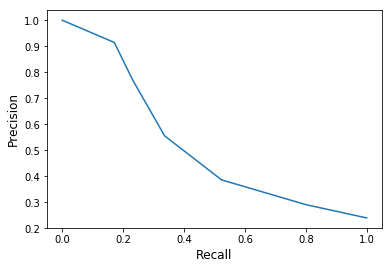

In [10]:
# Построим график precision-recall
pr, re, thres = precision_recall_curve(y_test, predictions[:, 1])
plt.plot( re, pr )
plt.xlabel('Recall', fontsize='large')
plt.ylabel('Precision', fontsize='large' )

In [11]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.4618421406925569

In [12]:
# Теперь построим ROC AUC для KNeighborsClassifier
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 2.0)
(0.005027832644999102, 0.17069701280227595, 1.0)
(0.022086550547674628, 0.2321479374110953, 0.8)
(0.08475489315855629, 0.3359886201991465, 0.6)
(0.26243490752379245, 0.5231863442389758, 0.4)
(0.6173460226252468, 0.8014224751066856, 0.2)
(1.0, 1.0, 0.0)


Text(0,0.5,'True positive rate')

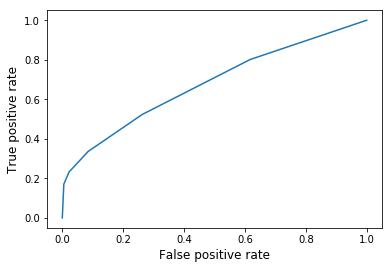

In [13]:
plt.plot( fpr, tpr )
plt.xlabel('False positive rate', fontsize='large')
plt.ylabel('True positive rate', fontsize='large' )

#### Подпор оптимальных параметров для модели с помощью Грид-серча 

In [23]:
k_range = list(range(1, 10))
param_neigh = dict(n_neighbors=k_range)

grid_neigh = GridSearchCV(model_neigh, param_neigh, cv=10, scoring='accuracy')
grid_neigh.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Text(0,0.5,'Cross-Validated Accuracy')

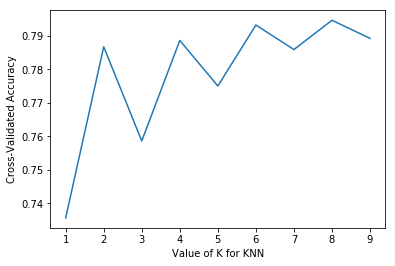

In [24]:
# Отображение на графике результатов работы Грид-серча
test_scores = grid_neigh.cv_results_['mean_test_score']

plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [29]:
# Оценка модели
model_neigh_best = grid_neigh.best_estimator_
model_neigh_best.score(X_test, y_test)

0.79451306899611

In [25]:
# Построение ROC AUC для наилучшей модели
predictions_best = model_neigh_best.predict_proba(X_test)

Text(0,0.5,'True positive rate')

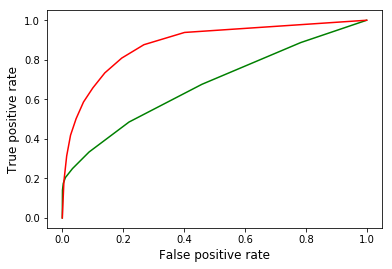

In [28]:
# Теперь построим ROC AUC для KNeighborsClassifier
fpr_best, tpr_best, thres_best = roc_curve(y_test, predictions_best[:, 1])

plt.plot( fpr_best, tpr_best, 'g' ) # Зеленый - для лучшей модели
plt.plot( fpr, tpr, 'r' ) # Красный - для модели по умолчанию

plt.xlabel('False positive rate', fontsize='large')
plt.ylabel('True positive rate', fontsize='large' )

## 2.2 Модель (RandomForestClassifier)

In [14]:
# Новая модель для обучения
model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
# Предсказания слйчаного леса
predictions = model_forest.predict_proba(X_test)
model_forest.score(X_test, y_test)

0.8478127345935986

In [16]:
predictions

array([[0.6, 0.4],
       [0.1, 0.9],
       [0.7, 0.3],
       ...,
       [1. , 0. ],
       [0.7, 0.3],
       [1. , 0. ]])

Text(0,0.5,'Precision')

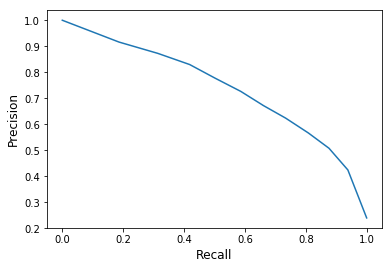

In [17]:
# Построим график precision-recall
pr, re, thres = precision_recall_curve(y_test, predictions[:, 1])

plt.plot( re, pr )
plt.xlabel('Recall', fontsize='large')
plt.ylabel('Precision', fontsize='large')

In [19]:
# площадь под кривой
average_precision_score(y_test, predictions[:, 1] )

0.7083773047754123

Text(0,0.5,'True positive rate')

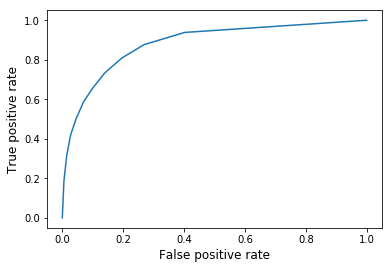

In [18]:
# Теперь построим ROC AUC для RandomForestClassifier
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

plt.plot( fpr, tpr )
plt.xlabel('False positive rate', fontsize='large')
plt.ylabel('True positive rate', fontsize='large' )

#### Подпор оптимальных параметров для модели с помощью Грид-серча 

In [36]:
estimators = list(range(1, 10))
min_samples_leafs = list(range(1,10))
param_forest = dict(n_estimators=estimators, min_samples_leaf=min_samples_leafs)

grid_forest = GridSearchCV(model_forest, param_forest, cv=10, scoring='accuracy')
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [44]:
# Оценка модели
model_forest_best = grid_forest.best_estimator_
model_forest_best.score(X_test, y_test)

0.8600286630724083

In [45]:
# Построение ROC AUC для наилучшей модели
predictions_best = model_forest_best.predict_proba(X_test)

Text(0,0.5,'True positive rate')

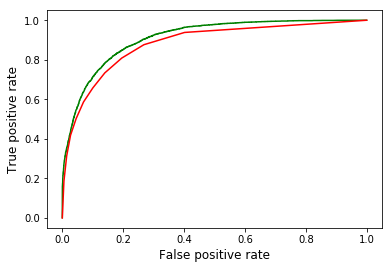

In [46]:
# Теперь построим ROC AUC для KNeighborsClassifier
fpr_best, tpr_best, thres_best = roc_curve(y_test, predictions_best[:, 1])

plt.plot( fpr_best, tpr_best, 'g' ) # Зеленый - для лучшей модели
plt.plot( fpr, tpr, 'r' ) # Красный - для модели по умолчанию

plt.xlabel('False positive rate', fontsize='large')
plt.ylabel('True positive rate', fontsize='large' )